<a href="https://colab.research.google.com/github/manualrg/dslab-nlp-dl/blob/master/01_intronlp_sklpl_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feture Engineering Pipelines para NLP

In [ ]:
import typing

import numpy as np
import pandas as pd
import sklearn
import nltk

from sklearn.datasets import fetch_20newsgroups
from sklearn import preprocessing
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

In [ ]:
print(f"{sklearn.__version__=}")
print(f"{nltk.__version__=}")
print(f"{pd.__version__=}")

sklearn.__version__='1.6.1'
nltk.__version__='3.9.1'
pd.__version__='2.2.2'


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
RND_SEED = 123
PCT_TEST = 0.2

In [ ]:

categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

def load_dataset(categories, remove=(), random_state = 123):
    """Load and vectorize the 20 newsgroups dataset."""

    data_train = fetch_20newsgroups(
        subset="train",
        categories=categories,
        shuffle=True,
        random_state=random_state,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        categories=categories,
        shuffle=True,
        random_state=random_state,
        remove=remove,
    )

    y_train, y_test = data_train.target, data_test.target
    X_train, X_test = data_train.data, data_test.data
    labels = data_train.target_names


    return  (X_train,  # list[str]
    X_test, # list[str]
    y_train,  #array[int]
    y_test,  # array[int]
    labels  # list[str]
             )

def viz_example(X, y, labels, idx):
  print("text:", X[idx])
  print("label index:", y[idx])
  print("label:", labels[y[idx]])

#viz_example(X_train, y_train, labels, 0)

# Scikit Learn Transformers y Estimators. Pipelines

Estimador: Objeto que tiene un método `fit()` y al usarlo con datos, varía su comportamiento, convirtiendose en un `Transformer`

Transformer: Objeto que aplica operaciones a los datos. Existen:
* Transformer en sí: Implementa el método `transform()`, por ejemplo sklearn.preprocessing.StandardScaler
* Predictors: Implementa el método `predict()`, y se trata de modelos sklearn.linear_model.LogisticRegression

Nótese que los `Transformers` para la preparación de datos, suelen tener un método `fit_transform()` y que los modelos no supervisados, presentan tanto `predict()` como `transform()`

In [ ]:
_X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])


scaler = preprocessing.StandardScaler()

try:
  scaler.scale_
except:
  print("ERROR: Objeto sin entrenar, no se puede acceder a sus atributos")

scaler.fit(_X_train)

print(f"{scaler.mean_}")  # column-wise mean
print(f"{scaler.scale_}")  # np.sqrt(var_)

_X_scaled = scaler.transform(_X_train)
_X_scaled

ERROR: Objeto sin entrenar, no se puede acceder a sus atributos
[1.         0.         0.33333333]
[0.81649658 0.81649658 1.24721913]


array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

## Scikit Learn Pipeline

Encadena secuencias de Transformadores y opcionalmente, un estimador final.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

_X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

_X_test = np.array([[ 2., -2.,  0.],
                   [ 2.,  1.,  -1.]])

_y_train = np.array([ 0., 1.,  2.])

scaler = preprocessing.StandardScaler()
model = LogisticRegression()

pl_skl = Pipeline([
    ('fte', scaler),
    ('model', model)
])

pl_skl.fit(_X_train, _y_train)

Pipeline(steps=[('fte', StandardScaler()), ('model', LogisticRegression())])

In [ ]:
# Evita el data leakage entre train y test/prod

_y_pred = pl_skl.predict(_X_test)
_y_pred

array([1., 1.])

# Feature Engineering para NLP

In [ ]:
X_train, X_test, y_train, y_test, labels = load_dataset(
    categories, random_state = RND_SEED
    )


viz_example(X_train, y_train, labels, 0)

text: From: gmt@beach.cis.ufl.edu (Gary McTaggart)
Subject: 3d Animation Studio file format??
Organization: Univ. of Florida CIS Dept.
Lines: 7
Distribution: world
NNTP-Posting-Host: beach.cis.ufl.edu

Is the ".3ds" file format for Autodesk's 3D Animation Studio available?

Thanks,
Gary

(Please respond by email.  I have a hell of a time keeping up with news!!
:-) )

label index: 1
label: comp.graphics


## CountVectorizer

Usado para obtener una DTM de TF sobre el corpus
[enlace](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

fte_tf = CountVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    stop_words="english",
    analyzer="word",
    # Counting
    vocabulary = ["usa", "france", "uk"],
    ngram_range=(1,1),
    binary=False
)

fte_tf


CountVectorizer(stop_words='english', strip_accents='ascii',
                vocabulary=['usa', 'france', 'uk'])

In [ ]:
fte_tf.fit(X_train)
X_train_fte = fte_tf.transform(X_train)  # retorna una matriz "sparse"
X_train_fte

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 354 stored elements and shape (2034, 3)>

In [ ]:
pd.DataFrame(X_train_fte[:5,:].todense(), columns=fte_tf.get_feature_names_out())

,usa,france,uk
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


In [ ]:
vocab_tf = fte_tf.vocabulary_
vocab_tf

{'usa': 0, 'france': 1, 'uk': 2}

In [ ]:
# Obtener la TF en el corpus de cada termino del vocabulario
freq_xtrain = X_train_fte.todense().sum(axis=0)
pd.DataFrame(freq_xtrain, columns=fte_tf.get_feature_names_out())

,usa,france,uk
0,209,17,396


In [ ]:
# Obtener el documento con más menciones de 'usa' del corpus

idx_max_counts = X_train_fte.argmax(axis=0)  # np.matrix
print(f"{idx_max_counts=}")

idx_max_usa_counts = idx_max_counts[0,0]  # usa
print(f"{idx_max_usa_counts=}")

print("TF:\n",
    X_train_fte[idx_max_usa_counts,:].todense()  # fila en  DTM
    )


_usa_doc =  X_train[idx_max_usa_counts]
print("Aprox number of words:", len(_usa_doc.split(" ")))
print("text:\n",
     _usa_doc[:150] # texto
    )


idx_max_counts=matrix([[2033, 1043, 2033]])
idx_max_usa_counts=np.int64(2033)
TF:
 [[ 7  1 12]]
Aprox number of words: 8474
text:
 From: nfotis@ntua.gr (Nick C. Fotis)
Subject: (17 Apr 93) Computer Graphics Resource Listing : WEEKLY [part 1/3]
Lines: 1566
Reply-To: nfotis@theseas.


## TFIDFVectorizer

Usado para obtener una DTM de TF-IDF sobre el corpus enlace [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

fte_tfidf = TfidfVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    stop_words="english",
    analyzer="word",
    # Counting
    max_features=32,
    ngram_range=(1,1),
    use_idf=True
)

fte_tfidf

TfidfVectorizer(max_features=32, stop_words='english', strip_accents='ascii')

In [ ]:
fte_tfidf.fit(X_train)
X_train_fte = fte_tfidf.transform(X_train)  # retorna una matriz "sparse"

In [ ]:
se_vocab_imp = (pd.Series(
      data=X_train_fte.mean(axis=0).tolist()[0],
      index=fte_tfidf.get_feature_names_out(),
      name="tf"
    )
  .sort_values(ascending=False)
  )


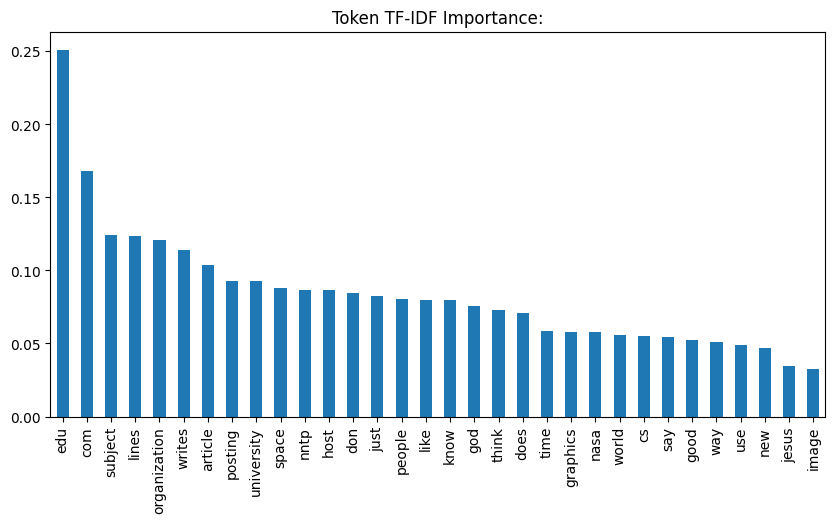

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

se_vocab_imp.plot.bar()
plt.title("Token TF-IDF Importance:")
plt.show()

In [ ]:
vocab_tfidf = fte_tfidf.vocabulary_
pd.Series(vocab_tfidf, name="idx")[:10]

,idx
edu,5
subject,24
organization,19
lines,15
world,30
nntp,18
posting,21
host,9
time,26
article,0


## HashingVectorizer

Realiza una DTM con un conteo de TF, pero sin mantener el diccionario de `vocabulary_`

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

fte_hash_32feat = HashingVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    stop_words="english",
    analyzer="word",
    # Counting
    n_features=32,
    ngram_range=(1,1),
)

fte_hash_32feat

HashingVectorizer(n_features=32, stop_words='english', strip_accents='ascii')

In [ ]:
X_train_fte_hash_32feat = fte_hash_32feat.transform(X_train)
pd.DataFrame(X_train_fte_hash_32feat[:5,:].todense())

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.136083,-0.272166,0.000000,0.136083,-0.272166,-0.136083,0.000000,0.000000,-0.136083,-0.272166,...,0.000000,-0.272166,0.000000,0.408248,0.000000,0.136083,0.000000,0.000000,0.000000,0.000000
1,0.087706,0.175412,0.087706,-0.175412,0.087706,0.087706,0.263117,0.263117,-0.350823,-0.526235,...,-0.087706,0.087706,0.000000,-0.175412,0.000000,-0.087706,-0.263117,-0.175412,0.175412,-0.175412
2,0.000000,0.000000,-0.069338,-0.554700,-0.069338,-0.346688,-0.069338,-0.138675,0.000000,-0.277350,...,0.138675,0.000000,0.000000,-0.138675,0.000000,0.000000,0.138675,0.000000,0.138675,0.069338
3,0.388290,-0.443760,0.332820,0.000000,-0.055470,0.000000,0.110940,-0.110940,0.221880,0.000000,...,0.000000,0.000000,-0.055470,0.055470,0.000000,0.110940,0.221880,-0.055470,-0.055470,-0.166410
4,-0.060193,-0.361158,-0.060193,-0.361158,-0.060193,0.180579,0.180579,-0.060193,0.060193,-0.060193,...,0.120386,-0.361158,0.060193,-0.300965,-0.180579,0.060193,0.421350,0.000000,0.120386,0.060193


In [ ]:
fte_hash= HashingVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    stop_words="english",
    analyzer="word",
    # Counting
    ngram_range=(1,1),
)

X_train_fte_hash = fte_hash.transform(X_train)
X_train_fte_hash.shape  # default: 2 ** 20 = 1048576

(2034, 1048576)

# TF-IDF sobre dataset real

## Dataset

In [ ]:
df_data = pd.read_csv("hf://datasets/MariaIsabel/FR_NFR_Spanish_requirements_classification/New Spanish Academic Dataset.csv")
# para este dataset, no hace falta cuenta de HF
df_data.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,PROJECT,REQUIREMENT,FINAL_LABEL
0,16,Poder crear un usuario y acceder a través de é...,NF
1,16,Poder crear un perfil personal e individual a ...,F
2,16,Acceder a la aplicación y a sus funcionalidade...,NF
3,16,Todos los datos introducidos podrán ser leídos...,NF
4,16,"Poder leer, eliminar, editar o incluir cualqui...",F


In [ ]:
df_data.shape

(389, 3)

In [ ]:
df_data['FINAL_LABEL'].value_counts()

,count
FINAL_LABEL,
F,300
NF,89


In [ ]:
idx = 10
df_data.loc[idx, "REQUIREMENT"], df_data.loc[idx, "FINAL_LABEL"]

('Que toda la información que proporcione a la aplicación y las operaciones que realice no puedan ser consultadas por otros usuarios.',
 'NF')

## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df_data["REQUIREMENT"],
    df_data["FINAL_LABEL"],
    test_size=PCT_TEST,
    random_state=RND_SEED,
    stratify=df_data["FINAL_LABEL"]
)

## Diseño del vocabulario

Proceso iterativo que consiste en:
* Decidir el algoritmo de tokenization
* Decidir el conjunto de `stopwords`
* Estudiar los valores más razonables para `max_df`, `min_df` y `max_features`

### Algoritmo de Tokenization

In [ ]:
# prompt: create a tfidfvectorizer with a custom tokenizer from nltk stemmter for spanish
import string

class SpanishStemTokenizer:
    def __init__(self):
        self.stemmer = SnowballStemmer("spanish")

    def __call__(self, text) -> typing.List[str]:
        return [self.stemmer.stem(word) for word in word_tokenize(text) if word not in string.punctuation]

tokenizer_es = SpanishStemTokenizer()

for example in ["lenguaje", "cantautores", "olimpiadas", "ribosoma", "artificial", "gradient", "muy bien!"]:
  _tokenized =tokenizer_es(example)
  print(f"{example=},\t {_tokenized} ")


example='lenguaje',	 ['lenguaj'] 
example='cantautores',	 ['cantautor'] 
example='olimpiadas',	 ['olimpi'] 
example='ribosoma',	 ['ribosom'] 
example='artificial',	 ['artificial'] 
example='gradient',	 ['gradient'] 
example='muy bien!',	 ['muy', 'bien'] 


### Conjunto de stopwords

In [ ]:
stopword_es = nltk.corpus.stopwords.words('spanish')
stopword_es[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [ ]:
stopword_es_tok = list(set([tokenizer_es(term.lower())[0] for term in stopword_es]))

stopword_es_tok[:5]

['estand', 'sea', 'fui', 'per', 'seas']

### Estudio Hiperpametros de Vocabulario

In [ ]:
fte_tf_es_uni = CountVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    tokenizer=SpanishStemTokenizer(),
    stop_words= stopword_es_tok,
    analyzer="word",
    # Counting
    ngram_range=(1,1),
).fit(X_train)

fte_tf_es_bi = CountVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    tokenizer=SpanishStemTokenizer(),
    stop_words= stopword_es_tok,
    analyzer="word",
    # Counting
    max_features=24,
    ngram_range=(2,2),
).fit(X_train)


fte_tf_es_tri = CountVectorizer(
    # preprocessor
    strip_accents="ascii",
    lowercase=True,
    # Tokenizacion
    tokenizer=SpanishStemTokenizer(),
    stop_words= stopword_es_tok,
    analyzer="word",
    # Counting
    max_features=24,
    ngram_range=(3,3),
).fit(X_train)



X_train_fte_tfuni =  fte_tf_es_uni.transform(X_train)
X_train_fte_tfbi =  fte_tf_es_bi.transform(X_train)
X_train_fte_tftri =  fte_tf_es_tri.transform(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['tambi'] not in stop_words.
  warnings.warn(


In [ ]:
def get_vocab_tf(dtm_tf, terms: typing.List[str], label: str = 'unigrams'):
 return pd.Series(
     data=(dtm_tf.sum(axis=0)# numpy.matrix 2d
           .tolist()[0]
           ),
     index=terms,
     name=label
  ).sort_values(ascending=False)

se_freq_uni = get_vocab_tf(
     X_train_fte_tfuni,
     fte_tf_es_uni.get_feature_names_out(),
     label='unigrams'
 )
se_freq_bi = get_vocab_tf(
     X_train_fte_tfbi,
     fte_tf_es_bi.get_feature_names_out(),
     label='bigrams'
 )
se_freq_tri = get_vocab_tf(
     X_train_fte_tftri,
     fte_tf_es_tri.get_feature_names_out(),
     label='trigrams'
 )

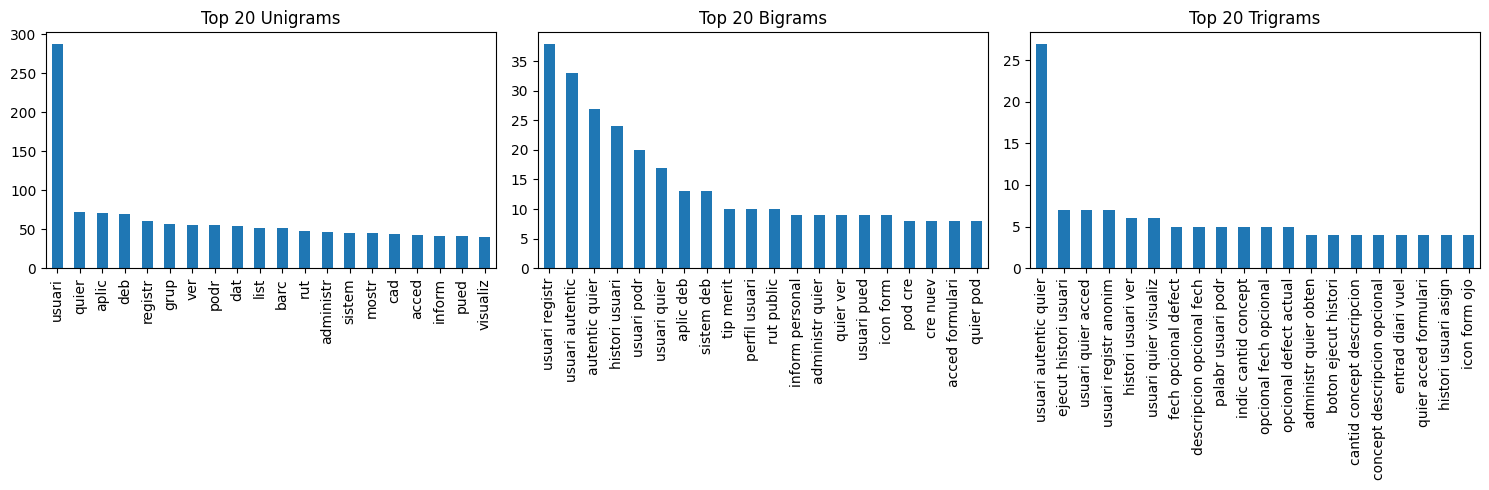

In [ ]:
# prompt: matplotlib suplots 3 plots in a row

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

se_freq_uni.sort_values(ascending=False).head(20).plot.bar(ax=axes[0])
axes[0].set_title("Top 20 Unigrams")

se_freq_bi.sort_values(ascending=False).head(20).plot.bar(ax=axes[1])
axes[1].set_title("Top 20 Bigrams")

se_freq_tri.sort_values(ascending=False).head(20).plot.bar(ax=axes[2])
axes[2].set_title("Top 20 Trigrams")

plt.tight_layout()
plt.show()

In [ ]:
bigrams = ["inform personal"]

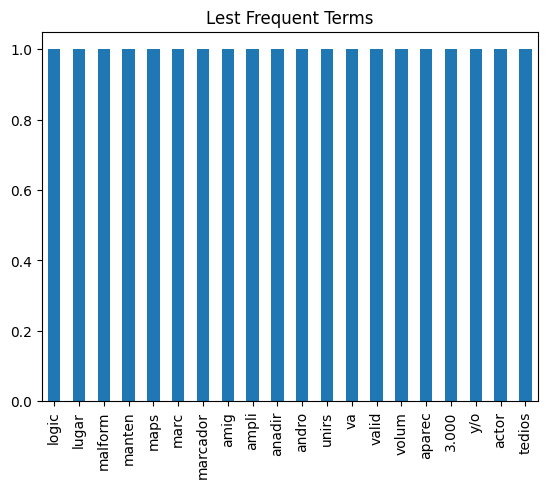

In [ ]:
se_freq_uni.sort_values(ascending=True).head(20).plot.bar()
plt.title("Lest Frequent Terms")
plt.show()

## Construcción de la pipeline de FTE

In [ ]:
X_train[:2]

,REQUIREMENT
385,Respuestas coherentes e idénticas ante entrada...
299,Gestión de usuarios: Todos los administradores...


In [ ]:
# prompt: create a sklearn pipeline to input a  corpus of documents X_train and apply two paralell transformations, one that computes tfidf over unigrams and othe other that computes only bigrams on a given vocabulary

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression


# Define the two parallel transformers
tfidf_unigrams = TfidfVectorizer(
    strip_accents="ascii",
    lowercase=True,
    tokenizer=SpanishStemTokenizer(),
    stop_words=stopword_es_tok,
    analyzer="word",
    max_features=3,
    ngram_range=(1, 1),
    use_idf=True
)

tfidf_bigrams = TfidfVectorizer(
    strip_accents="ascii",
    lowercase=True,
    tokenizer=SpanishStemTokenizer(),
    stop_words=stopword_es_tok,
    analyzer="word",
    ngram_range=(2, 2),
    vocabulary=["inform personal"],
    use_idf=True
)

# Create a FeatureUnion to combine the outputs of the transformers
feature_union = FeatureUnion([
    ('unigrams', tfidf_unigrams),
    ('bigrams', tfidf_bigrams)
])

# Create the pipeline
skl_pl = Pipeline([
    ('fte', feature_union),
    # Add a model here if needed, e.g., a classifier
    # ('clf', LogisticRegression())
])

skl_pl

Pipeline(steps=[('fte',
                 FeatureUnion(transformer_list=[('unigrams',
                                                 TfidfVectorizer(max_features=3,
                                                                 stop_words=['estand',
                                                                             'sea',
                                                                             'fui',
                                                                             'per',
                                                                             'seas',
                                                                             'seras',
                                                                             'erais',
                                                                             'vuestr',
                                                                             'fuist',
                                                                             'tendran',
                                                                             'si',
                                                                             'estan',
                                                                             'he',
                                                                             'yo',
                                                                             'nosotr',
                                                                             'tambien',
                                                                             'hast',
                                                                             'contr',
                                                                             'nad',
                                                                             'unos',
                                                                             'fue',
                                                                             'una',
                                                                             'suy',
                                                                             'por',
                                                                             'tod',
                                                                             'has',
                                                                             'estos',
                                                                             'al',
                                                                             'mias',
                                                                             'habran', ...],
                                                                 strip_accents='ascii',
                                                                 to...
                                                                 stop_words=['estand',
                                                                             'sea',
                                                                             'fui',
                                                                             'per',
                                                                             'seas',
                                                                             'seras',
                                                                             'erais',
                                                                             'vuestr',
                                                                             'fuist',
                                                                             'tendran',
                                                                             'si',
                                                                             'estan',
                                                                             'he',
        

In [ ]:
skl_pl.fit(X_train, y_train)

X_train_fte = skl_pl.named_steps['fte'].transform(X_train)
X_train_fte.shape


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['tambi'] not in stop_words.
  warnings.warn(


(311, 4)

In [ ]:
pd.DataFrame(
    X_train_fte[:5].todense(),
    columns=skl_pl.named_steps['fte'].get_feature_names_out()
)

,unigrams__aplic,unigrams__quier,unigrams__usuari,bigrams__inform personal
0,0.000000,0.000000,1.000000,0.0
1,0.000000,0.000000,1.000000,0.0
2,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,1.000000,0.0
4,0.656035,0.648223,0.386557,0.0


# Ejercicio: Obtener la distribución de vocabulario del dataset 20newsgroup
1. Usar el Vectorizer adecuado y entrenarlo sobre el corpus
2. Obtener la matriz DTM con el vectorizer
3. Aplicar el cálculo necesario a dicha matriz, para obtener el conteo de cada término el en corpus